## Import libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

sns.set()

## Load and look at descriptive statistics

In [2]:
# first index is the customer idi
df_segmentation = pd.read_csv('dataset/segmentation data.csv', index_col = 0)

In [3]:
df_segmentation

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


In [50]:
df_segmentation.shape

(2000, 7)

In [51]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


## Create correlation heatmap to see some insights

In [52]:
df_segmentation.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


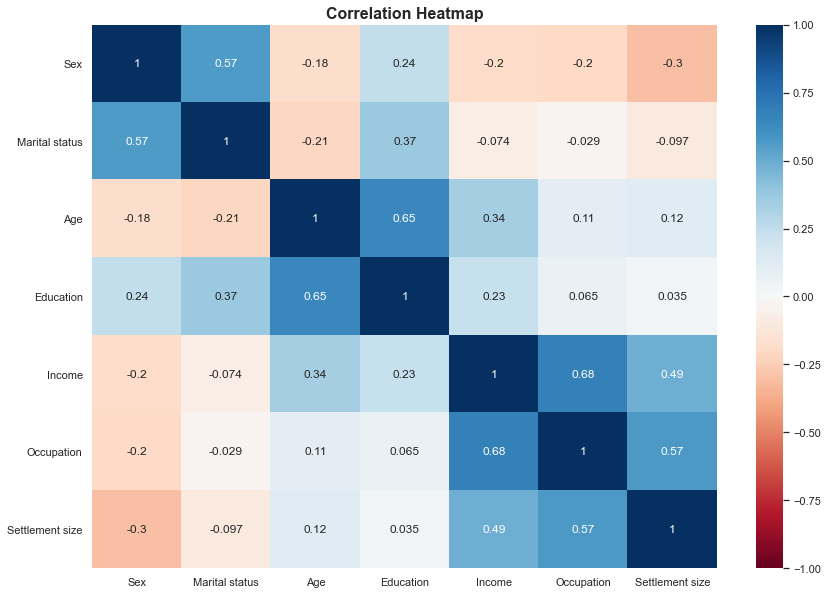

In [53]:
plt.figure(figsize = (14,10))
sns.heatmap(df_segmentation.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'RdBu')
plt.yticks(rotation = 0)
plt.title('Correlation Heatmap', weight = 'bold', fontsize = 16)
plt.show()

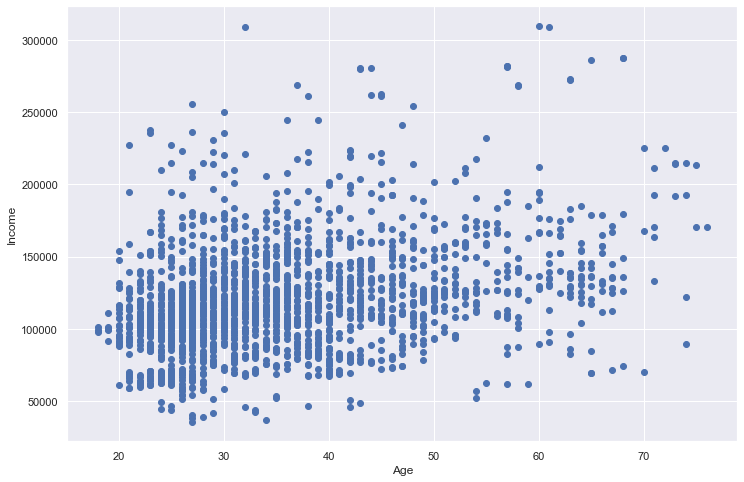

In [54]:
plt.figure(figsize = (12,8))
plt.scatter(df_segmentation['Age'],df_segmentation['Income'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

In [55]:
# standardize the data
scaler = StandardScaler()
df_segmentation_std = scaler.fit_transform(df_segmentation)

In [56]:
df_segmentation_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

## Hierarchical clustering
In practice, with a large amount of data, this clustering will be very slow.  
Usually we use Flat clustering to do this. But 1 advantage of this hierarchy is  
they determine a number of clusters for use unlike k-means that we need to specify by ourselves

In [57]:
cluster = linkage(df_segmentation_std, method = 'ward')

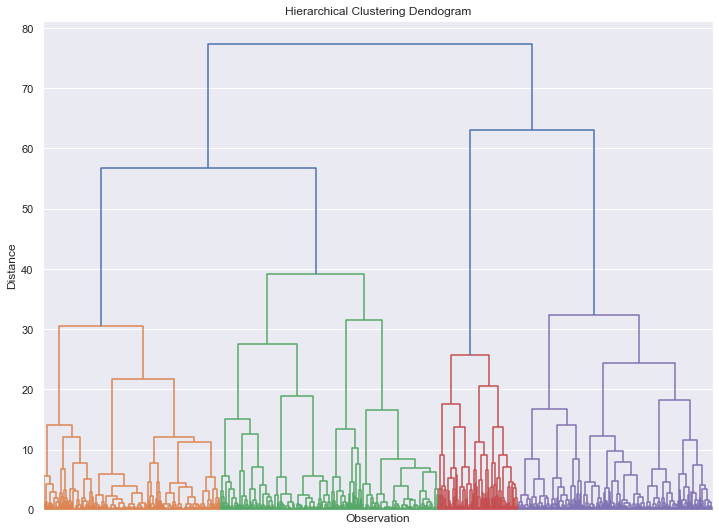

In [58]:
plt.figure(figsize=(12,9))
plt.title('Hierarchical Clustering Dendogram')
plt.xlabel('Observation')
plt.ylabel('Distance')
dendrogram(cluster,
           show_leaf_counts = False,
           no_labels = True)
plt.show()

## KMeans clustering

In [59]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 2)
    kmeans.fit(df_segmentation_std)
    wcss.append(kmeans.inertia_)

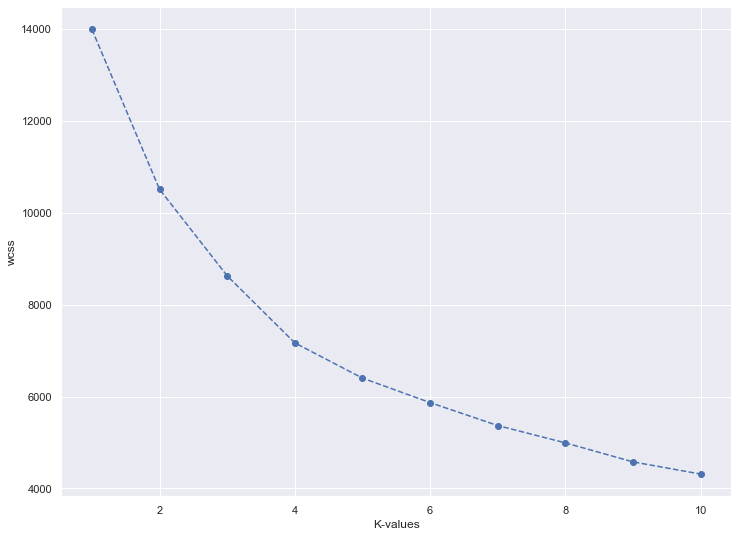

In [60]:
plt.figure(figsize = (12,9))
plt.plot(range(1,11),wcss, marker = 'o', linestyle = '--')
plt.xlabel('K-values')
plt.ylabel('wcss')
plt.show()

In [61]:
df_segmentation_kmeans = df_segmentation.copy()

In [62]:
# We use Elbow method to choose the K-value
# in this case 4 is suitable
kmeans = KMeans(n_clusters = 4, random_state = 2)
kmeans.fit(df_segmentation_std)
df_segmentation_kmeans['Cluster'] = kmeans.labels_

In [63]:
df_segmentation_analysis = df_segmentation_kmeans.groupby('Cluster').mean()
df_segmentation_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Cluster,,,,,,,
0,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266


In [64]:
df_segmentation_analysis['# of observations'] = df_segmentation_kmeans[['Cluster','Sex']].groupby(['Cluster']).count()
df_segmentation_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,# of observations
Cluster,,,,,,,,
0,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570
3,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263


In [65]:
df_segmentation_analysis['# obs ratio'] = df_segmentation_analysis['# of observations'] / df_segmentation_analysis['# of observations'].sum()
df_segmentation_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,# of observations,# obs ratio
Cluster,,,,,,,,,
0,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
3,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315


In [66]:
# Look at the data and try to intepret and name the clusters
# This is very CRUCIAL!
df_segmentation_analysis.rename({0: 'Standard',
                                 1: 'Fewer-opportunity',
                                 2: 'Career-focused',
                                 3: 'Well-off'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,# of observations,# obs ratio
Cluster,,,,,,,,,
Standard,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
Fewer-opportunity,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
Career-focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850
Well-off,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315


In [67]:
df_segmentation_kmeans['Labels'] = df_segmentation_kmeans['Cluster'].map({0: 'Standard',
                                                                         1: 'Fewer-opportunity',
                                                                         2: 'Career-focused',
                                                                         3: 'Well-off'})
df_segmentation_kmeans

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster,Labels
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,3,Well-off
100000002,1,1,22,1,150773,1,2,0,Standard
100000003,0,0,49,1,89210,0,0,1,Fewer-opportunity
100000004,0,0,45,1,171565,1,1,2,Career-focused
100000005,0,0,53,1,149031,1,1,2,Career-focused
...,...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1,Fewer-opportunity
100001997,1,1,27,1,117744,1,0,0,Standard
100001998,0,0,31,0,86400,0,0,1,Fewer-opportunity


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


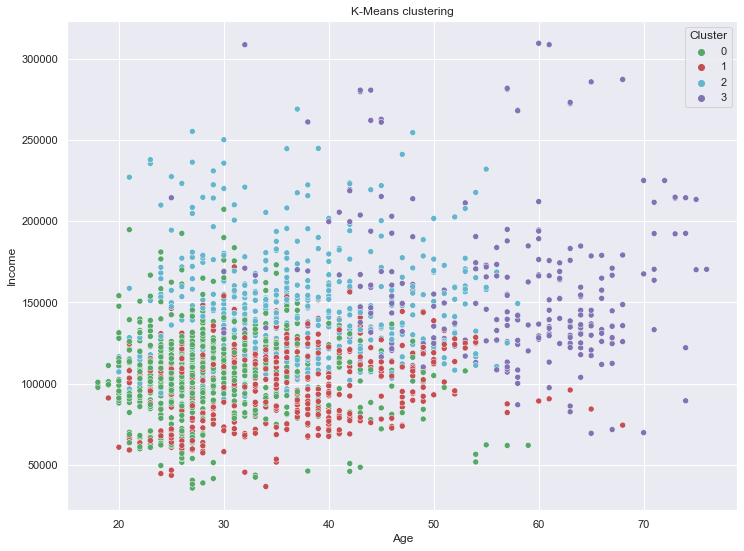

In [68]:
plt.figure(figsize = (12,9))
sns.scatterplot(df_segmentation_kmeans['Age'],
            df_segmentation_kmeans['Income'], 
            hue = df_segmentation_kmeans['Cluster'],
            palette = ['g','r','c','m'])
plt.title('K-Means clustering')
plt.show()

### cannot cluster the data very well, so we will do dimensionality reduction by doing PCA !

## PCA

In [69]:
pca = PCA()
pca.fit(df_segmentation_std)

PCA()

In [70]:
# look at the variance ratio to get the idea how much variance each component(feature) contribute
# This shows in descending order
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

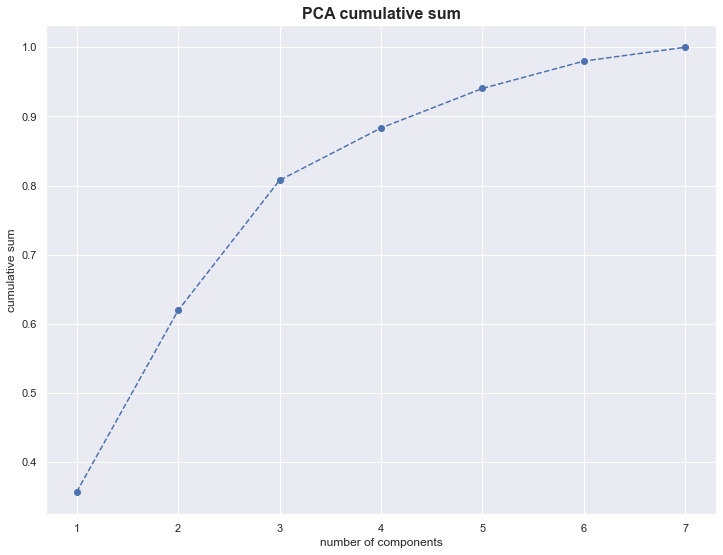

In [71]:
plt.figure(figsize = (12,9))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('PCA cumulative sum', fontweight = 'bold', fontsize = 16)
plt.xlabel('number of components')
plt.ylabel('cumulative sum')
plt.show()

From the plot above, there is no right or wrong to choose the number of components  
but there is a rule of thumb good for consider number of component that can contribute  
<b> over 80% </b> is fine  
in this case, 3 and 4 are worth trying with >4 looks like to be too much

In [72]:
#let's try 3 first
pca = PCA(n_components = 3)
pca.fit(df_segmentation_std)

PCA(n_components=3)

In [73]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

In [74]:
df_pca_comp = pd.DataFrame(data = pca.components_, 
                           columns = df_segmentation.columns.values,
                           index = ['Component 1','Component 2','Component 3'])
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


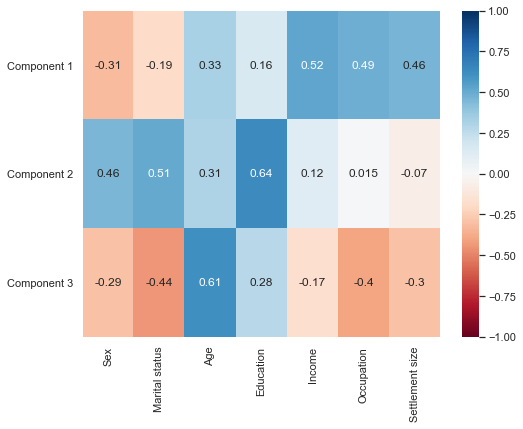

In [75]:
plt.figure(figsize=(8,6))
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1,
            cmap = 'RdBu',
           annot = True)
plt.yticks(rotation=0)
plt.show()

In [76]:
pca.transform(df_segmentation_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [77]:
scores_pca = pca.transform(df_segmentation_std)

In [78]:
# combine feature and keep only 3 components (features)
scores_pca.shape

(2000, 3)

## Let's do KMeans again

In [79]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, random_state = 2)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

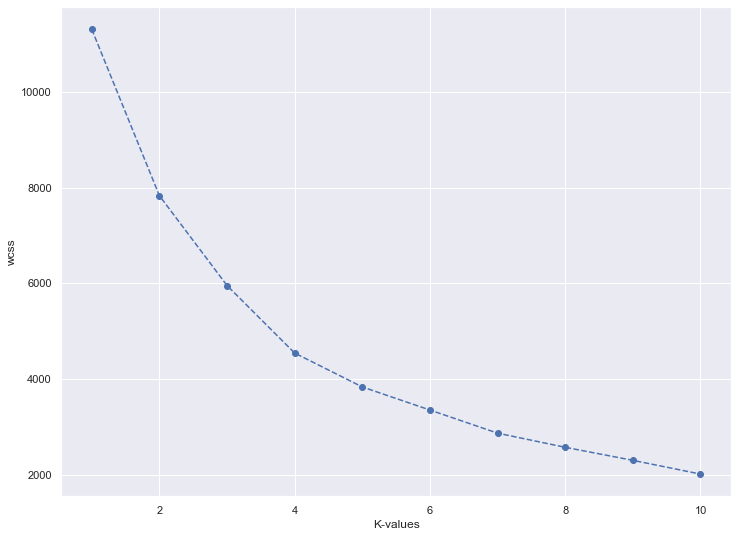

In [80]:
plt.figure(figsize = (12,9))
plt.plot(range(1,11),wcss, marker = 'o', linestyle = '--')
plt.xlabel('K-values')
plt.ylabel('wcss')
plt.show()

In [81]:
# we still choose 4
kmeans_pca = KMeans(n_clusters = 4, init='k-means++', random_state = 2)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=2)

In [82]:
df_segmentation

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0
100001997,1,1,27,1,117744,1,0
100001998,0,0,31,0,86400,0,0


In [83]:
df_segment_kmeans_pca = pd.concat([df_segmentation.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segment_kmeans_pca.columns.values[-3:] = ['Component 1','Component 2','Component 3']
df_segment_kmeans_pca['Cluster'] = kmeans_pca.labels_

In [84]:
df_segment_kmeans_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Cluster
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,1
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,3
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,3
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,0
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,0
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2


In [85]:
df_segment_kmeans_pca_freq = df_segment_kmeans_pca.groupby('Cluster').mean()
df_segment_kmeans_pca_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Cluster,,,,,,,,,,
0,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
1,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039
2,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
3,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046


In [86]:
df_segment_kmeans_pca_freq['# of observes'] = df_segment_kmeans_pca[['Cluster','Sex']].groupby('Cluster').count()
df_segment_kmeans_pca_freq['observes ratio'] = df_segment_kmeans_pca_freq['# of observes'] / df_segment_kmeans_pca_freq['# of observes'].sum()
df_segment_kmeans_pca_freq.rename({0: 'Fewer-opportunity',
                                 1: 'Well-off',
                                 2: 'Standard',
                                 3: 'Career-focused'})

# From this we can intepret that Component 1 is about 'career'
# component 2 is 'education/lifestyle'
# compoennt 3 is 'experience'

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,# of observes,observes ratio
Cluster,,,,,,,,,,,,
Fewer-opportunity,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
Well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325
Standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
Career-focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915


In [87]:
df_segment_kmeans_pca['Labels'] = df_segment_kmeans_pca['Cluster'].map({0: 'Fewer-opportunity',
                                                                     1: 'Well-off',
                                                                     2: 'Standard',
                                                                     3: 'Career-focused'})

In [88]:
df_segment_kmeans_pca

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Cluster,Labels
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,1,Well-off
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,2,Standard
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,0,Fewer-opportunity
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,3,Career-focused
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,3,Career-focused
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,0,Fewer-opportunity
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,2,Standard
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,0,Fewer-opportunity
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,2,Standard


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'K-Means clustering with PCA')

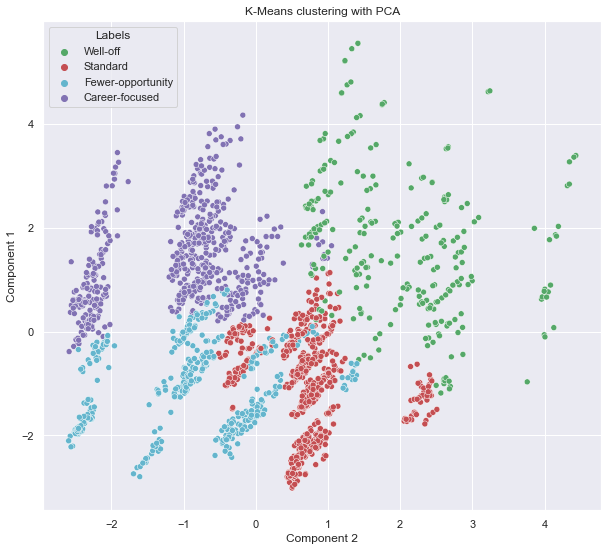

In [89]:
plt.figure(figsize=(10,9))
sns.scatterplot(df_segment_kmeans_pca['Component 2'],
                df_segment_kmeans_pca['Component 1'],
                hue = df_segment_kmeans_pca['Labels'],
                palette = ['g','r','c','m'])
plt.title('K-Means clustering with PCA')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'K-Means clustering with PCA')

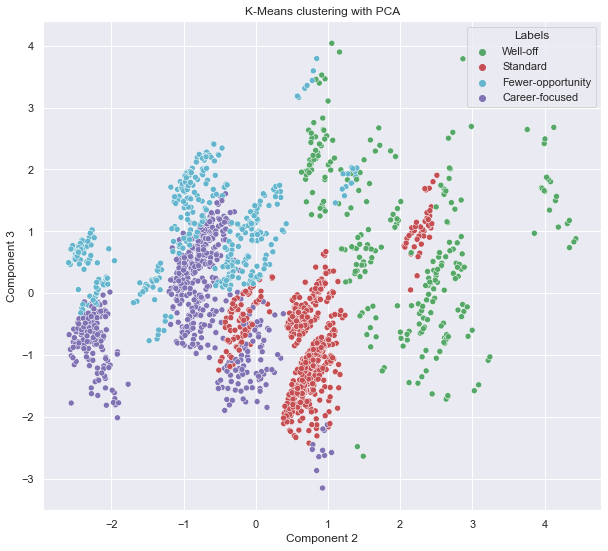

In [90]:
plt.figure(figsize=(10,9))
sns.scatterplot(df_segment_kmeans_pca['Component 2'],
                df_segment_kmeans_pca['Component 3'],
                hue = df_segment_kmeans_pca['Labels'],
                palette = ['g','r','c','m'])
plt.title('K-Means clustering with PCA')

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'K-Means clustering with PCA')

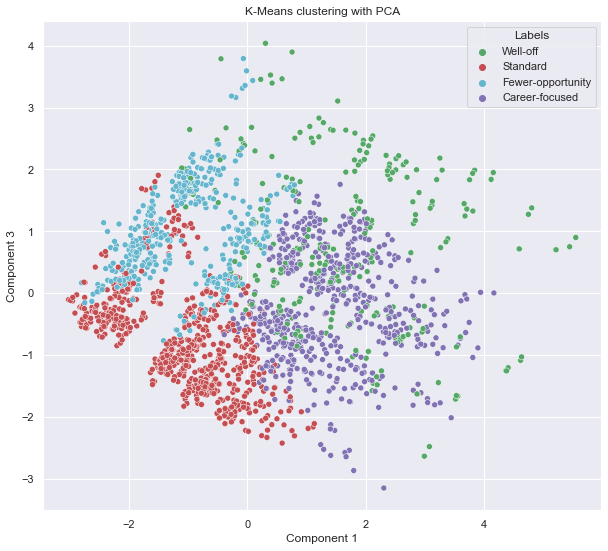

In [91]:
plt.figure(figsize=(10,9))
sns.scatterplot(df_segment_kmeans_pca['Component 1'],
                df_segment_kmeans_pca['Component 3'],
                hue = df_segment_kmeans_pca['Labels'],
                palette = ['g','r','c','m'])
plt.title('K-Means clustering with PCA')

## From 3 plots, we can say Component 1 and 2 are the best for clustering
And that's what it should be because 1 and 2 are the conponent with the highest variance contribution

## Export!

In [92]:
pickle.dump(scaler,open('pickle/scaler.pickle','wb'))

In [93]:
pickle.dump(pca,open('pickle/pca.pickle','wb'))

In [94]:
pickle.dump(kmeans_pca,open('pickle/kmeans_pca.pickle','wb'))